CSC 5610 AI Tools and Paradigms
Instructor: Dr. Bukowy
Student: Arsalon Amini
Date: October 16, 2023
Project: Module 2 Lab 
Topic: Coorelation Exploration | Building and Assessing Performance of a Linear Regression Model

In [300]:
import pandas as pd

df = pd.read_feather("~/Desktop/ai_tools/modified_data.feather")
df.head()


,ADDRESS,CITY,ZIP,STATE,BEDS,BATHS,SQ__FT,TYPE,SALE_DATE,PRICE,LATITUDE,LONGITUDE
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,2008-05-21,59222.0,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,2008-05-21,68212.0,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,2008-05-21,68880.0,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,2008-05-21,69307.0,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,2008-05-21,81900.0,38.519470,-121.435768


In [227]:
print(df.dtypes)

ADDRESS        object
CITY           object
ZIP          category
STATE          object
BEDS            int64
BATHS           int64
SQ__FT          int64
TYPE         category
SALE_DATE      object
PRICE         float64
LATITUDE      float64
LONGITUDE     float64
dtype: object


In [228]:
###########################################
# Association Exploration between variables
###########################################

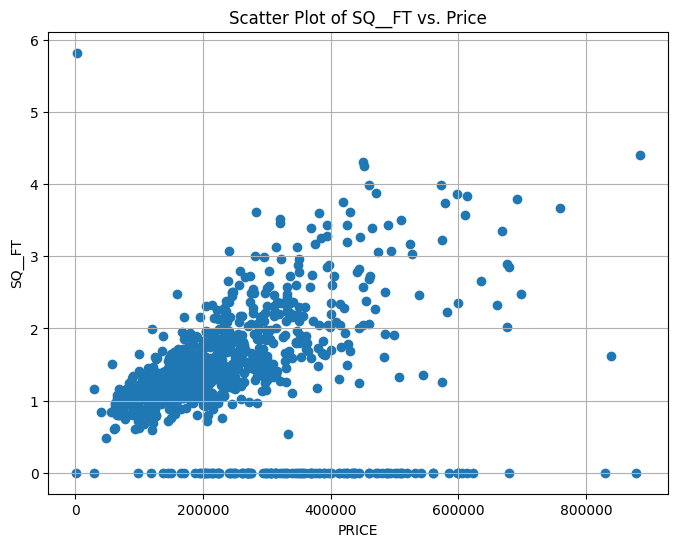

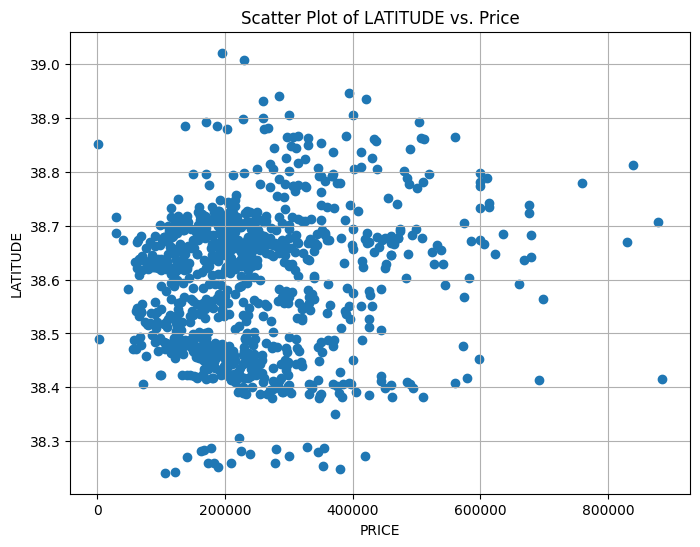

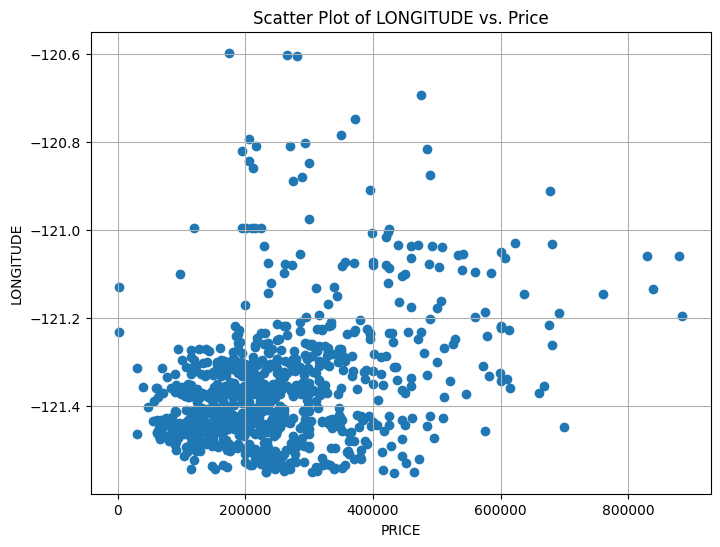

In [261]:
import matplotlib.pyplot as plt

continuous_vars = ['SQ__FT', 'LATITUDE', 'LONGITUDE']
# assume beds/bath are continous not discrete variables 

for var in continuous_vars:
    plt.figure(figsize=(8, 6))
    plt.scatter(df['PRICE'], df[var])
    plt.title(f'Scatter Plot of {var} vs. Price')
    plt.xlabel('PRICE')
    
    plt.ylabel(var)
    plt.grid(True)
    plt.show()

In [262]:
from scipy.stats import linregress
# continuous_vars = ['SQ__FT', 'LATITUDE', 'LONGITUDE']

for var in continuous_vars:
    result = linregress(df['PRICE'], df[var])
    
    print(f"Results for {var} vs. Price:")
    print(f"  Pearson's correlation coefficient (r): {result.rvalue:.3f}")
    print(f"  p-value: {result.pvalue:.3f}")
    print('-'*50)

Results for SQ__FT vs. Price:
  Pearson's correlation coefficient (r): 0.231
  p-value: 0.000
--------------------------------------------------
Results for LATITUDE vs. Price:
  Pearson's correlation coefficient (r): 0.152
  p-value: 0.000
--------------------------------------------------
Results for LONGITUDE vs. Price:
  Pearson's correlation coefficient (r): 0.355
  p-value: 0.000
--------------------------------------------------


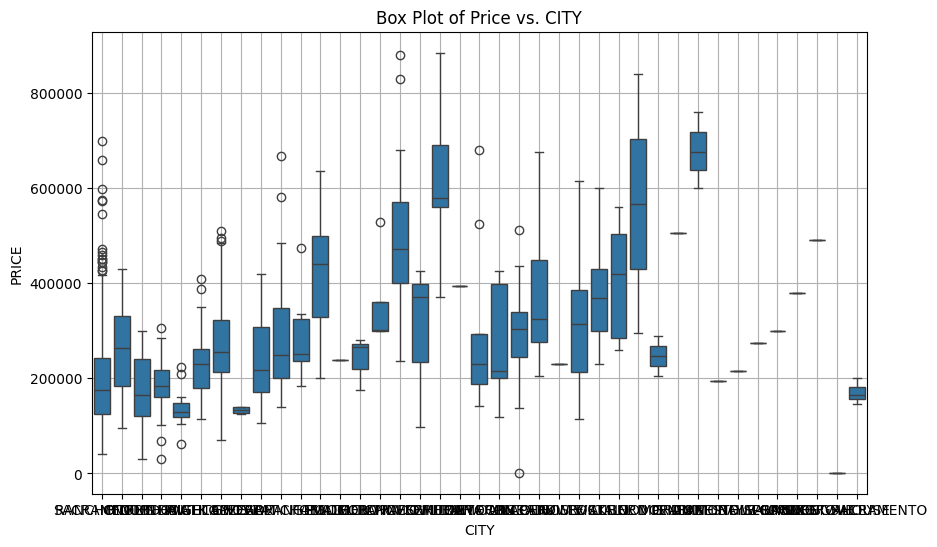

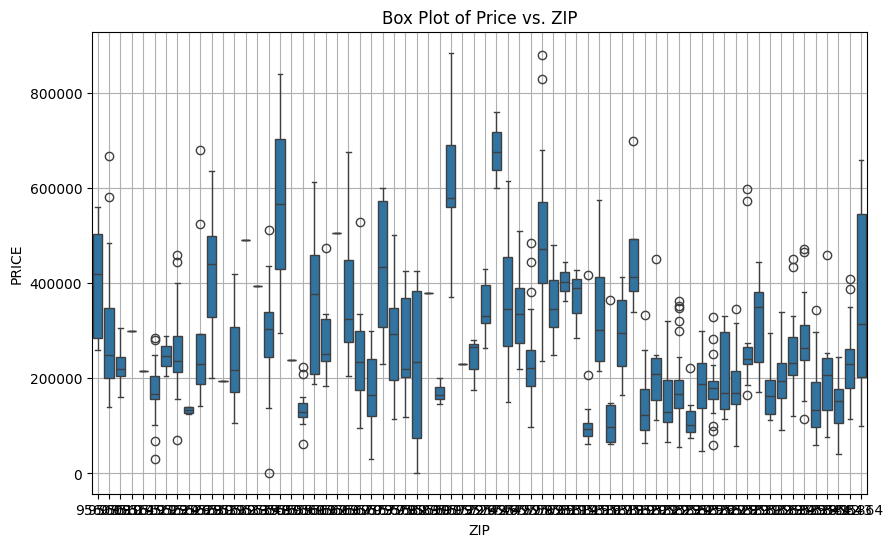

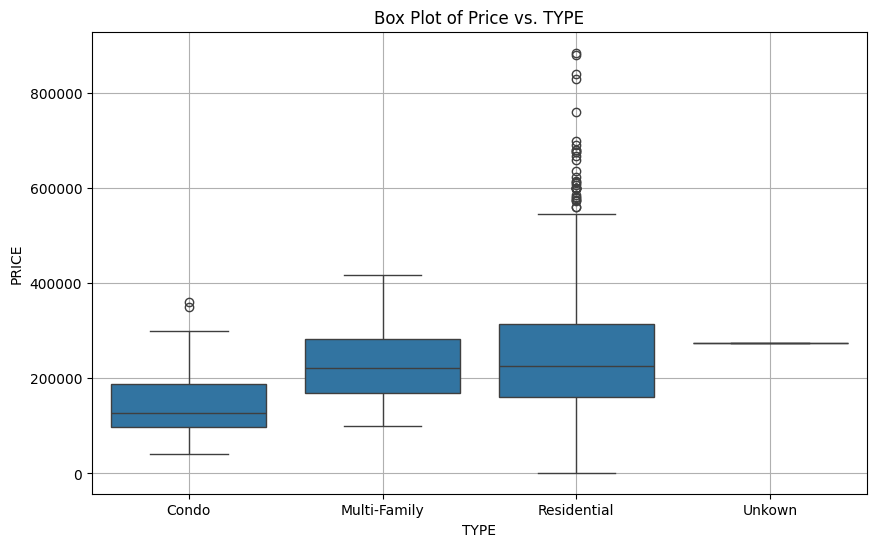

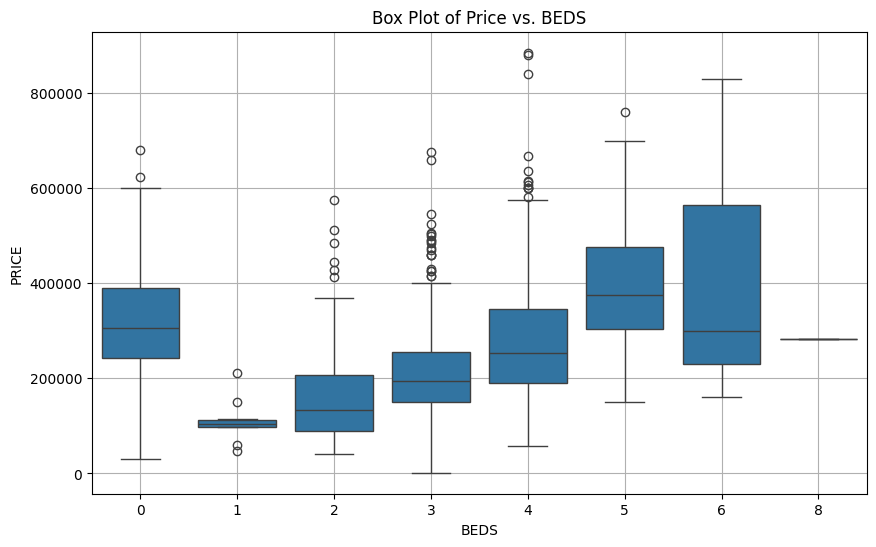

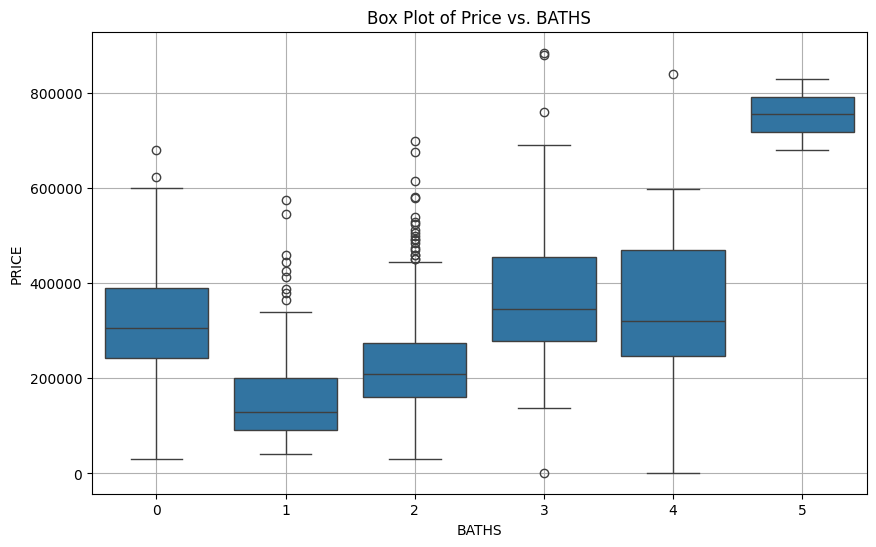

In [267]:
import matplotlib.pyplot as plt
import seaborn as sns

categorical_vars = ['CITY', 'ZIP','TYPE', 'BEDS', 'BATHS']

for var in categorical_vars:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[var], y=df['PRICE'])
    plt.title(f'Box Plot of Price vs. {var}')
    plt.xlabel(var)
    plt.ylabel('PRICE')
    plt.grid(True)
    plt.show()

In [263]:
# TYPE of property and Price 
from scipy.stats import kruskal

# Segregate prices by TYPE of property
samples_by_group = []
property_types = set(df["TYPE"])

for value in property_types:
    mask = df["TYPE"] == value
    samples_by_group.append(df["PRICE"][mask].tolist())

# Perform the stats test
stat, p = kruskal(*samples_by_group)

print("Kruskal-Wallis H-test for Price across all Property Types")
print(f"Kruskal-Wallis H-test statistic: {stat:.3f}")
print(f"P-value: {p:.3f}")

# Interpret the alpha
alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis: There are significant differences between the distribution of prices for condos and other property types.")
else:
    print("Fail to reject the null hypothesis: No significant differences between the distribution of prices for condos and other property types.")


Kruskal-Wallis H-test for Price across all Property Types
Kruskal-Wallis H-test statistic: 42.758
P-value: 0.000
Reject the null hypothesis: There are significant differences between the distribution of prices for condos and other property types.


In [273]:
# ZIP and Price 
from scipy.stats import kruskal

# Segregate prices by TYPE of property
samples_by_group = []
property_types = set(df["ZIP"])

for value in property_types:
    mask = df["ZIP"] == value
    samples_by_group.append(df["PRICE"][mask].tolist())

# Perform the stats test
stat, p = kruskal(*samples_by_group)

print("Kruskal-Wallis H-test for Price vs ZIP")
print(f"Kruskal-Wallis H-test statistic: {stat:.3f}")
print(f"P-value: {p:.3f}")

# Interpret the alpha
alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis: There are significant differences between the groups.")
else:
    print("Fail to reject the null hypothesis: No significant differences between the groups.")


Kruskal-Wallis H-test for Price vs ZIP
Kruskal-Wallis H-test statistic: 474.126
P-value: 0.000
Reject the null hypothesis: There are significant differences between the groups.


In [274]:
# CITY  and Price 
from scipy.stats import kruskal

# Segregate prices by TYPE of property
samples_by_group = []
property_types = set(df["CITY"])

for value in property_types:
    mask = df["CITY"] == value
    samples_by_group.append(df["PRICE"][mask].tolist())

# Perform the stats test
stat, p = kruskal(*samples_by_group)

print("Kruskal-Wallis H-test for Price vs CITY")
print(f"Kruskal-Wallis H-test statistic: {stat:.3f}")
print(f"P-value: {p:.3f}")

# Interpret the alpha
alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis: There are significant differences between the two groups.")
else:
    print("Fail to reject the null hypothesis: No significant differences between the two groups.")


Kruskal-Wallis H-test for Price vs CITY
Kruskal-Wallis H-test statistic: 301.300
P-value: 0.000
Reject the null hypothesis: There are significant differences between the two groups.


In [275]:
# BATHS  and Price 

# Segregate prices by TYPE of property
samples_by_group = []
property_types = set(df["BATHS"])

for value in property_types:
    mask = df["BEDS"] == value
    samples_by_group.append(df["PRICE"][mask].tolist())

# Perform the stats test
stat, p = kruskal(*samples_by_group)

print("Kruskal-Wallis H-test for Price vs BATHS")
print(f"Kruskal-Wallis H-test statistic: {stat:.3f}")
print(f"P-value: {p:.3f}")

# Interpret the alpha
alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis: There are significant differences between the two groups.")
else:
    print("Fail to reject the null hypothesis: No significant differences between the two groups.")

Kruskal-Wallis H-test for Price vs BATHS
Kruskal-Wallis H-test statistic: 228.481
P-value: 0.000
Reject the null hypothesis: There are significant differences between the two groups.


In [276]:
# BEDS  and Price 

# Segregate prices by TYPE of property
samples_by_group = []
property_types = set(df["BEDS"])

for value in property_types:
    mask = df["BEDS"] == value
    samples_by_group.append(df["PRICE"][mask].tolist())

# Perform the stats test
stat, p = kruskal(*samples_by_group)

print("Kruskal-Wallis H-test for Price across all Property Types")
print(f"Kruskal-Wallis H-test statistic: {stat:.3f}")
print(f"P-value: {p:.3f}")

# Interpret the alpha
alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis: There are significant differences between the two groups.")
else:
    print("Fail to reject the null hypothesis: No significant differences between the two groups.")


Kruskal-Wallis H-test for Price across all Property Types
Kruskal-Wallis H-test statistic: 229.708
P-value: 0.000
Reject the null hypothesis: There are significant differences between the two groups.


In [277]:
# Chi-squared test for association between beds and baths
contingency = pd.crosstab(df['BEDS'], df['BATHS'])
chi2, p, _, _ = chi2_contingency(contingency)
print(f"Chi2 value: {chi2}")
print(f"P-value: {p}")

# Set significance level
alpha = 0.05

# Determine whether to reject or keep the null hypothesis
if p < alpha:
    print("Reject the null hypothesis: There is a significant association between the variables.")
else:
    print("Fail to reject the null hypothesis: There is no significant association between the variables.")


Chi2 value: 1699.685354694527
P-value: 0.0
Reject the null hypothesis: There is a significant association between the variables.


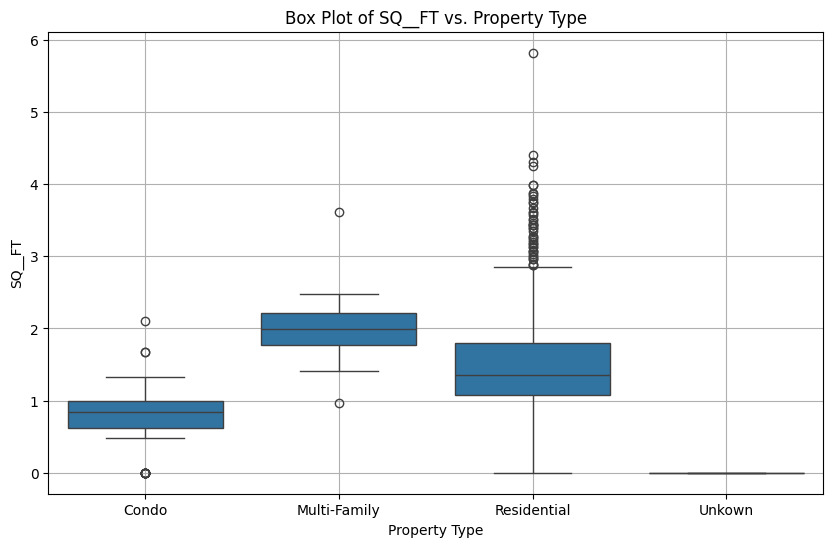

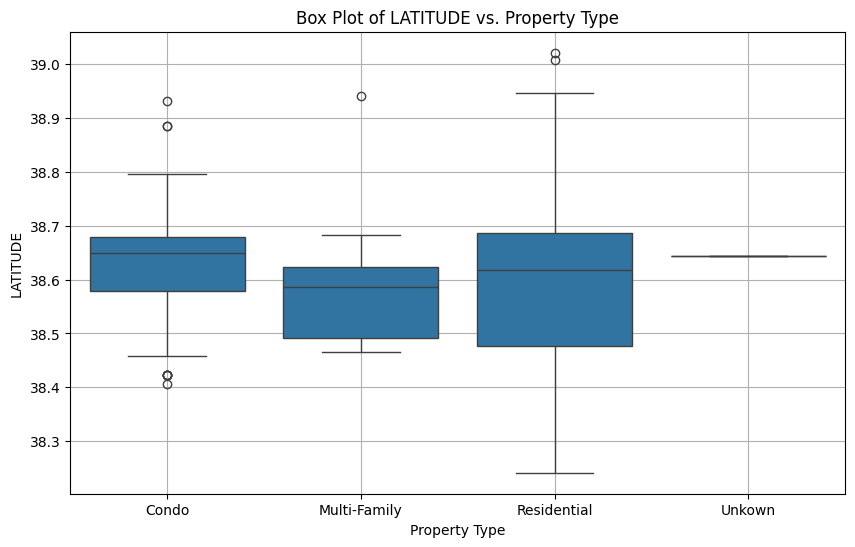

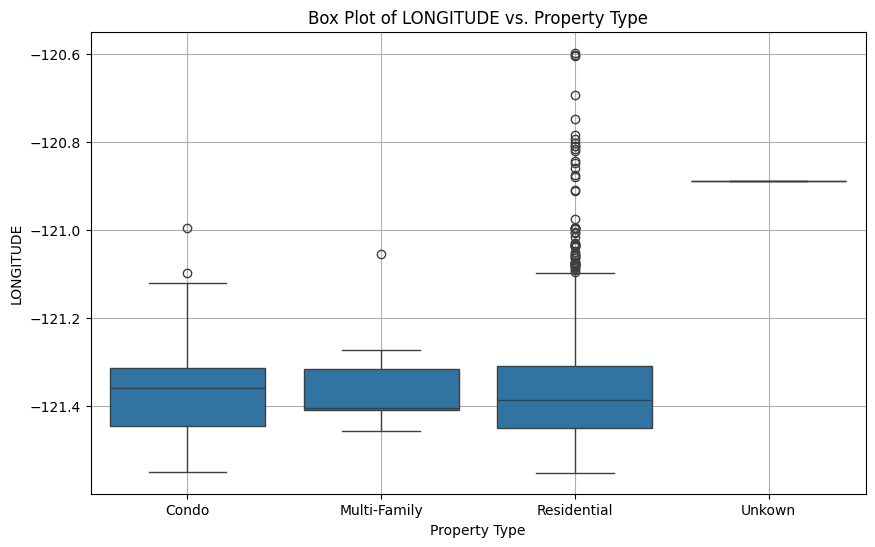

In [278]:
continuous_vars = ['SQ__FT', 'LATITUDE', 'LONGITUDE']

for var in continuous_vars:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df['TYPE'], y=df[var])
    plt.title(f'Box Plot of {var} vs. Property Type')
    plt.xlabel('Property Type')
    plt.ylabel(var)
    plt.grid(True)
    plt.show()



In [ ]:
########
#Type of Property as Dependent Variable
########

In [279]:
import scipy.stats as stats

# Perform the Kruskal-Wallis test
results = {}
for var in ['LONGITUDE', 'LATITUDE', 'SQ__FT', 'PRICE']:
    groups = [df[var][df['TYPE'] == t] for t in df['TYPE'].unique()]
    h_stat, p_value = stats.kruskal(*groups)
    results[var] = (h_stat, p_value)

# Display results and check null hypothesis
alpha = 0.05  # significance level
for var, (h_stat, p_value) in results.items():
    print(f"For variable {var}:")
    print(f"  H-statistic: {h_stat}")
    print(f"  P-value: {p_value}")
    if p_value < alpha:
        print(f"  The null hypothesis is rejected for {var}.")
    else:
        print(f"  The null hypothesis cannot be rejected for {var}.")
    print("---------------------------")

For variable LONGITUDE:
  H-statistic: 3.7499659807677284
  P-value: 0.2897598116176345
  The null hypothesis cannot be rejected for LONGITUDE.
---------------------------
For variable LATITUDE:
  H-statistic: 4.036681650695204
  P-value: 0.25753031996151793
  The null hypothesis cannot be rejected for LATITUDE.
---------------------------
For variable SQ__FT:
  H-statistic: 65.04544372289406
  P-value: 4.905000727744239e-14
  The null hypothesis is rejected for SQ__FT.
---------------------------
For variable PRICE:
  H-statistic: 42.75754092922894
  P-value: 2.7706842112531717e-09
  The null hypothesis is rejected for PRICE.
---------------------------


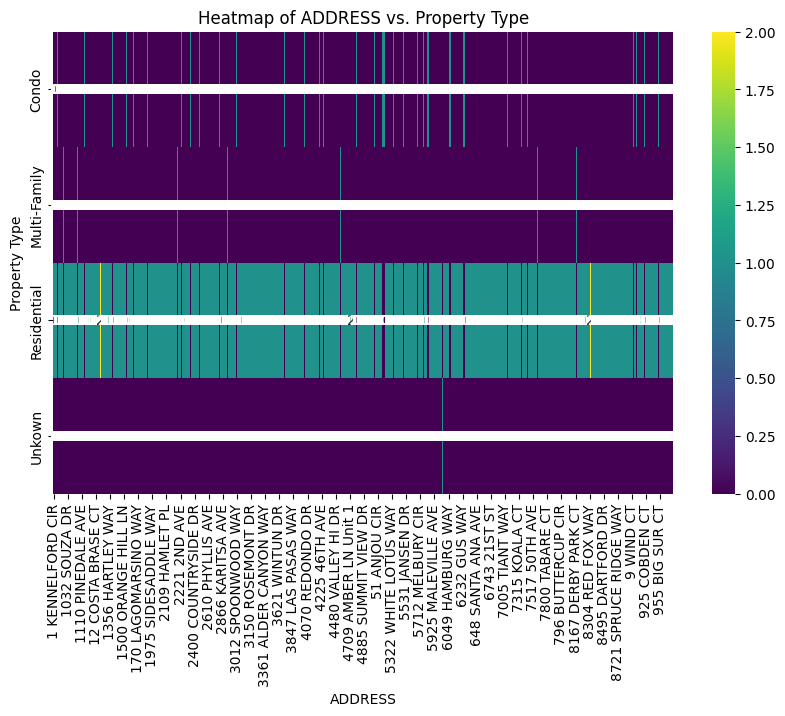

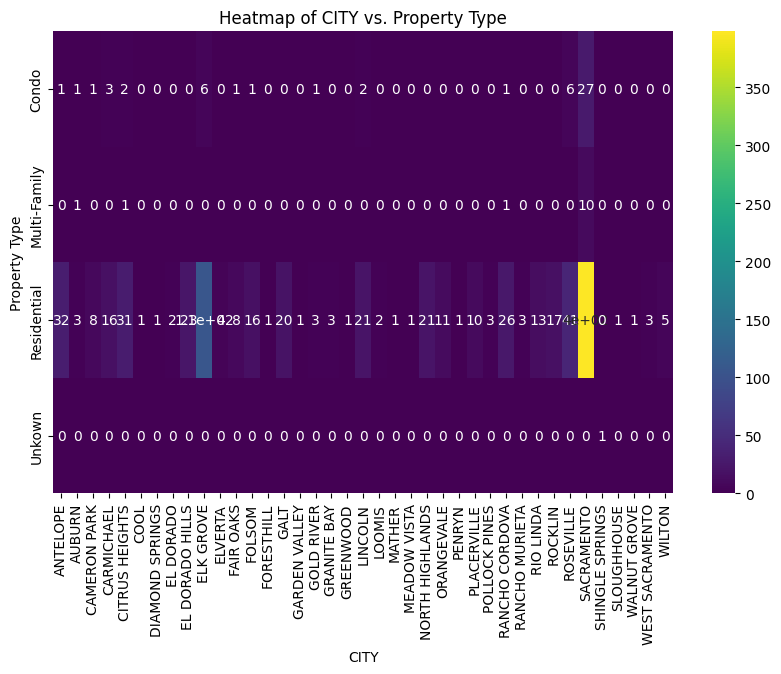

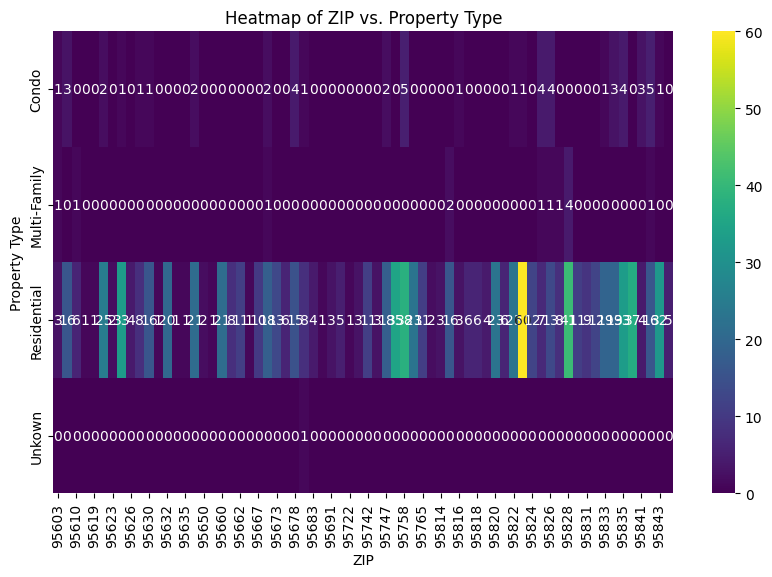

In [241]:
#Heat maps
current_categorical_vars = ['ADDRESS','CITY', 'ZIP']
for var in current_categorical_vars:
    cross_tab = pd.crosstab(df['TYPE'], df[var])
    plt.figure(figsize=(10, 6))
    sns.heatmap(cross_tab, annot=True, cmap='viridis', cbar=True)
    plt.title(f"Heatmap of {var} vs. Property Type")
    plt.xlabel(var)
    plt.ylabel('Property Type')
    plt.show()

In [280]:
from scipy.stats import chi2_contingency

for var in current_categorical_vars:
    contingency_table = pd.crosstab(df['TYPE'], df[var])
    chi2, p, _, _ = chi2_contingency(contingency_table)

    print('-'*50)
    print(f"Chi-squared Test for {var} vs. TYPE OF PROPERTY:")
    print(f"Statistic: {chi2:.3f}, P-value: {p:.3f}")

    alpha = 0.01
    if p < alpha:
        print("Reject the null hypothesis: There are significant associations between the groups.")
    else:
        print("Fail to reject the null hypothesis: No significant associations between the groups.")
    
    
    

--------------------------------------------------
Chi-squared Test for ADDRESS vs. TYPE OF PROPERTY:
Statistic: 2778.000, P-value: 0.432
Fail to reject the null hypothesis: No significant associations between the groups.
--------------------------------------------------
Chi-squared Test for CITY vs. TYPE OF PROPERTY:
Statistic: 972.857, P-value: 0.000
Reject the null hypothesis: There are significant associations between the groups.
--------------------------------------------------
Chi-squared Test for ZIP vs. TYPE OF PROPERTY:
Statistic: 281.036, P-value: 0.000
Reject the null hypothesis: There are significant associations between the groups.


In [243]:
############################################
# Ordinary Least Squares Regression Modeling
############################################

In [292]:
######################################
# Forward Selection (Feature Selection) - determining the R2 impact of features added sequentially to the model 
######################################
import numpy as np
import statsmodels.api as sm

# SQ__FT as a single predictor 
df['SQ__FT'] = df['SQ__FT'] / 1000 
X = sm.add_constant(df[['SQ__FT']])  # Add an intercept manually
y = df['PRICE']

model_with_sqft = sm.OLS(y, X).fit()
print("Simple Linear Regression Model Summary")
print("#"*20)
print(model_with_sqft.summary())

Simple Linear Regression Model Summary
####################
                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     52.12
Date:                Mon, 23 Oct 2023   Prob (F-statistic):           1.09e-12
Time:                        17:16:52   Log-Likelihood:                -12206.
No. Observations:                 926   AIC:                         2.442e+04
Df Residuals:                     924   BIC:                         2.443e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

In [293]:
# BEDS a single predictor 
X = sm.add_constant(df[['BEDS']])  # Add an intercept manually
y = df['PRICE']

model_with_beds = sm.OLS(y, X).fit()
print("Simple Linear Regression Model Summary")
print("#"*20)
print(model_with_beds.summary())

Simple Linear Regression Model Summary
####################
                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     39.45
Date:                Mon, 23 Oct 2023   Prob (F-statistic):           5.19e-10
Time:                        17:17:15   Log-Likelihood:                -12212.
No. Observations:                 926   AIC:                         2.443e+04
Df Residuals:                     924   BIC:                         2.444e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

In [294]:
# BATHS a single predictor 
X = sm.add_constant(df[['BATHS']])  # Add an intercept manually
y = df['PRICE']

model_with_baths = sm.OLS(y, X).fit()
print("Simple Linear Regression Model Summary")
print("#"*20)
print(model_with_beds.summary())

Simple Linear Regression Model Summary
####################
                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     39.45
Date:                Mon, 23 Oct 2023   Prob (F-statistic):           5.19e-10
Time:                        17:17:17   Log-Likelihood:                -12212.
No. Observations:                 926   AIC:                         2.443e+04
Df Residuals:                     924   BIC:                         2.444e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

In [295]:
# single predictor 
X = sm.add_constant(df[['LONGITUDE']])  # Add an intercept manually
y = df['PRICE']

model_with_long = sm.OLS(y, X).fit()
print("Simple Linear Regression Model Summary")
print("#"*20)
print(model_with_long.summary())

Simple Linear Regression Model Summary
####################
                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.126
Model:                            OLS   Adj. R-squared:                  0.125
Method:                 Least Squares   F-statistic:                     133.2
Date:                Mon, 23 Oct 2023   Prob (F-statistic):           7.14e-29
Time:                        17:17:20   Log-Likelihood:                -12169.
No. Observations:                 926   AIC:                         2.434e+04
Df Residuals:                     924   BIC:                         2.435e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

In [296]:
# Creating Model One (Combining features)
variables_to_add = ['BEDS', 'BATHS','LATITUDE', 'LONGITUDE']
adjusted_r2 = model_with_sqft.rsquared_adj

for var in variables_to_add:
    X[var] = df[var]
    model_with_new_var = sm.OLS(y, X).fit()

    print("#"*20)
    if model_with_new_var.rsquared_adj > adjusted_r2:
        adjusted_r2 = model_with_new_var.rsquared_adj
        model_with_sqft = model_with_new_var
        print(f"Adjusted R² increased with {var}. Keeping the variable.")
    else:
        print(f"Adjusted R² decreased with {var}. Not keeping the variable.")
        X = X.drop(var, axis=1)

print("#"*20)
print("Forward Selected Model Summary")
print("#"*20)
print(model_with_sqft.summary())

####################
Adjusted R² increased with BEDS. Keeping the variable.
####################
Adjusted R² increased with BATHS. Keeping the variable.
####################
Adjusted R² increased with LATITUDE. Keeping the variable.
####################
Adjusted R² decreased with LONGITUDE. Not keeping the variable.
####################
Forward Selected Model Summary
####################
                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.210
Model:                            OLS   Adj. R-squared:                  0.207
Method:                 Least Squares   F-statistic:                     61.35
Date:                Mon, 23 Oct 2023   Prob (F-statistic):           5.58e-46
Time:                        17:17:23   Log-Likelihood:                -12122.
No. Observations:                 926   AIC:                         2.425e+04
Df Residuals:                     921   BIC:            

In [298]:
# Calculate RMSE
rmse = np.sqrt((model_with_sqft.resid**2).mean())
print(f"RMSE: {rmse:.2f}")

# Calculate MAPE
mape = 100 * (np.abs(model_with_sqft.resid) / y).mean()
print(f"MAPE: {mape:.2f}%")

print("-"*40)

# Interpretation
print("Interpretation:")
print("1. RMSE (Root Mean Square Error):")
print(f"   - RMSE of {rmse:.2f} indicates, on average, the model's predictions are off by this amount.")
print("2. MAPE (Mean Absolute Percentage Error):")
print(f"   - MAPE of {mape:.2f}% means the model's predictions are, on average, this percentage off from the actual values.")

RMSE: 117248.19
MAPE: 93.65%
----------------------------------------
Interpretation:
1. RMSE (Root Mean Square Error):
   - RMSE of 117248.19 indicates, on average, the model's predictions are off by this amount from the actual values.
   - Lower RMSE values are better, indicating a closer fit of the model's predictions to the actual values.
2. MAPE (Mean Absolute Percentage Error):
   - MAPE of 93.65% means the model's predictions are, on average, this percentage off from the actual values.
   - Lower MAPE values are preferable, implying the model's predictions are closer in percentage terms to the actual values.


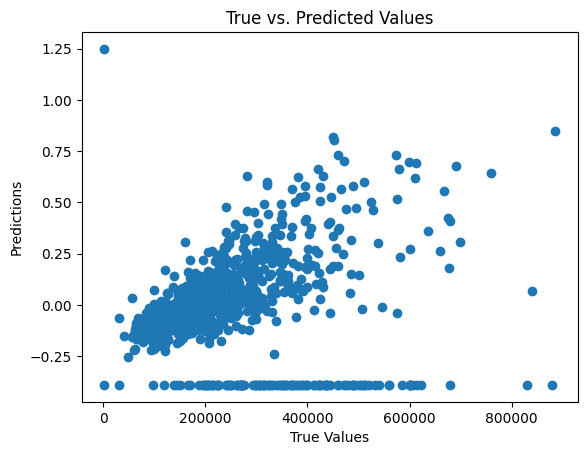

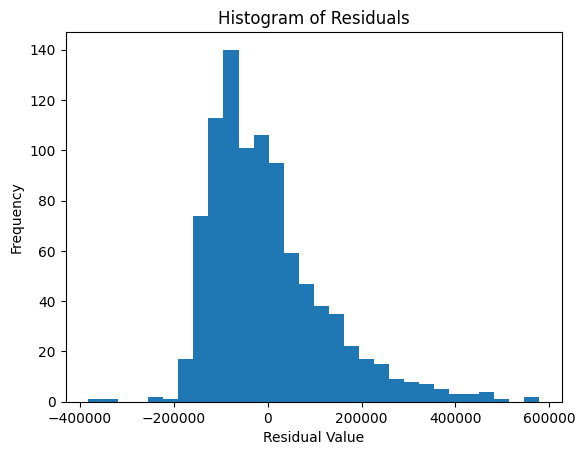

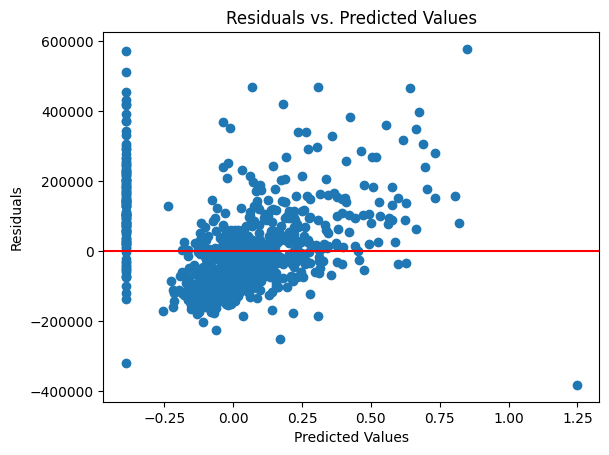

In [286]:
#####################
# Plotting Residuals
#####################


residuals = model.resid

# Plot distribution of residuals
plt.hist(residuals, bins=30)
plt.title("Histogram of Residuals")
plt.xlabel("Residual Value")
plt.ylabel("Frequency")
plt.show()

# Plot residuals vs. predicted values
plt.scatter(predicted, residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.title("Residuals vs. Predicted Values")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()


In [303]:
import pandas as pd
import statsmodels.api as sm

# Convert ZIP and TYPE to dummy variables
zip_dummies = pd.get_dummies(df['ZIP'], prefix='ZIP', drop_first=True)
type_dummies = pd.get_dummies(df['TYPE'], prefix='TYPE', drop_first=True)

# Convert SALE_DATE to datetime and extract year, month, and day
df['SALE_DATE'] = pd.to_datetime(df['SALE_DATE'])
df['YEAR'] = df['SALE_DATE'].dt.year
df['MONTH'] = df['SALE_DATE'].dt.month
df['DAY'] = df['SALE_DATE'].dt.day

# Optional: Create a continuous variable for days since the earliest date
df['DAYS_SINCE_START'] = (df['SALE_DATE'] - df['SALE_DATE'].min()).dt.days

# Concatenate the dummy variables to the dataframe first
df = pd.concat([df, zip_dummies, type_dummies], axis=1)

# Now drop the original categorical and date columns
df = df.drop(columns=['ADDRESS', 'CITY', 'STATE', 'ZIP', 'TYPE', 'SALE_DATE'])

# Define your independent variables (all columns except 'PRICE') and dependent variable (PRICE)
X = df.drop('PRICE', axis=1)
y = df['PRICE']

# Convert boolean columns to integer
bool_cols = X.select_dtypes(include=['bool']).columns
X[bool_cols] = X[bool_cols].astype(int)

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the regression model
model_v2 = sm.OLS(y, X).fit()

# Display the model summary
print(model_v2.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.578
Method:                 Least Squares   F-statistic:                     17.67
Date:                Mon, 23 Oct 2023   Prob (F-statistic):          1.21e-128
Time:                        17:21:09   Log-Likelihood:                -11792.
No. Observations:                 926   AIC:                         2.374e+04
Df Residuals:                     849   BIC:                         2.411e+04
Df Model:                          76                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
BEDS              -1.097e+04   4705.17

In [304]:
# Calculate RMSE
rmse = np.sqrt((model_v2.resid**2).mean())
print(f"RMSE: {rmse:.2f}")

# Calculate MAPE
mape = 100 * (np.abs(model_v2.resid) / y).mean()
print(f"MAPE: {mape:.2f}%")


print("-"*40)


# Interpretation of values
print("Interpretation:")
print("1. RMSE (Root Mean Square Error):")
print(f"   - RMSE of {rmse:.2f} indicates, on average, the model's predictions are off this much from the actual values.")
print("2. MAPE (Mean Absolute Percentage Error):")
print(f"   - MAPE of {mape:.2f}% means the model's predictions are, on average, this percentage off from the actual values.")

RMSE: 82118.79
MAPE: 67.07%
----------------------------------------
Interpretation:
1. RMSE (Root Mean Square Error):
   - RMSE of 82118.79 indicates, on average, the model's predictions are off by this amount from the actual values.
   - Lower RMSE values are better, indicating a closer fit of the model's predictions to the actual values.
2. MAPE (Mean Absolute Percentage Error):
   - MAPE of 67.07% means the model's predictions are, on average, this percentage off from the actual values.
   - Lower MAPE values are preferable, implying the model's predictions are closer in percentage terms to the actual values.


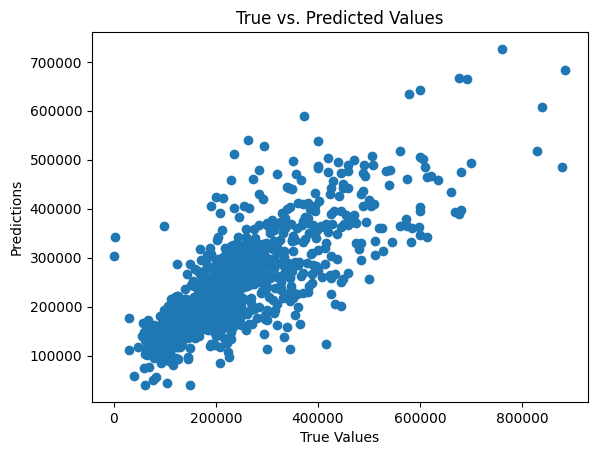

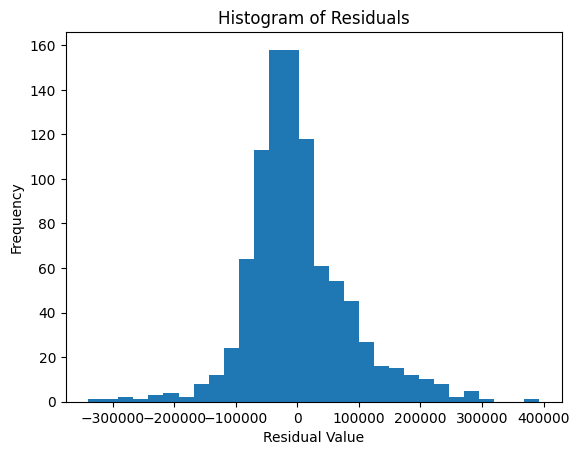

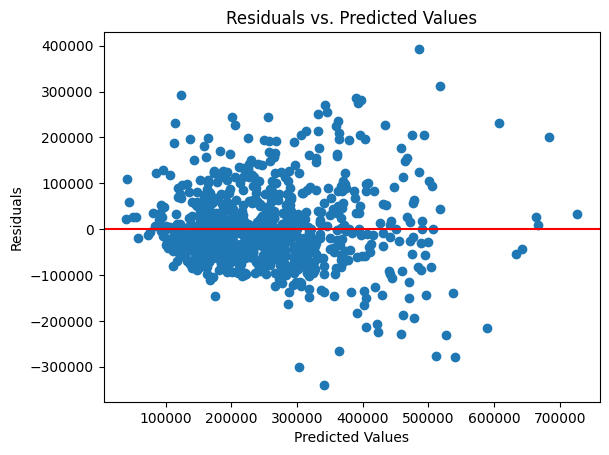

In [174]:

# get predicted values list
v2_predicted = model_v2.predict(X)

# plot the predicted vs. true values
plt.scatter(y, v2_predicted)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("True vs. Predicted Values")
plt.show()


# get residuals and plot
v2_residuals = model_v2.resid

plt.hist(residuals, bins=30)
plt.title("Histogram of Residuals")
plt.xlabel("Residual Value")
plt.ylabel("Frequency")
plt.show()

# Plot residuals vs. predicted values
plt.scatter(v2_predicted, v2_residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.title("Residuals vs. Predicted Values")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()